# Neural Networks

The purpose of this notebook is to implement a simple neural network for digits recognition with a usage of MNIST dataset. We will apply the backpropagation algorithm and then we will try to improve the performance of our network by using regularization.

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_set_name = os.path.join(os.getcwd(), 'data/mnist_train.csv')
test_set_name = os.path.join(os.getcwd(), 'data/mnist_test.csv')
df_train = pd.read_csv(train_set_name, engine='python')
df_test = pd.read_csv(test_set_name, engine='python')
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Before we start implementing the neural network it's a good idea to visualize the dataset. The dataframe contains 785 columns: in the first column there is a label of written number and in the other columns there are values in a range from 0 to 255 indicating the brightness of each pixel. To reproduce the written numbers we will define the function that reshapes 1-dimensional array of pixels into 2-dimensional array (28x28) which will be displayed later using binary colormap.

In [3]:
def show_number(dataframe, index):
    label = dataframe['label'][index]
    pixels = np.array(dataframe.iloc[index, 1:])
    pixels = pixels.reshape((28, 28))
    
    plt.imshow(pixels, cmap='binary')
    plt.title(label)
    plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

Now we can visualize some numbers with the usage of defined function.

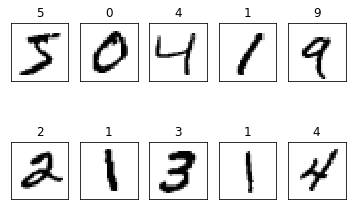

In [4]:
for i in range(1, 11):
    plt.subplot(2, 5, i)
    show_number(df_train, i-1)

We can also see the frequency of occurance of each number in our dataset. To do so we will plot the histogram of the column with number labels.

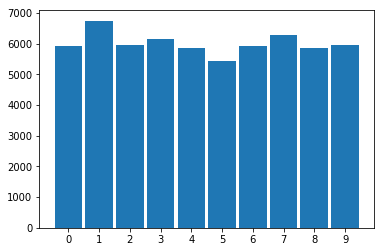

In [5]:
ax = df_train['label'].hist(bins=np.arange(11) - 0.5, grid=False, rwidth=0.9)
ax.xaxis.set_ticks(np.arange(0, 10, 1))
plt.show(ax)

As we can see the distribution of the numbers is quite uniform. Every number appears in the dataset about 4000 times.

Now we will split the dataset into training set and validation set which will be used later to optimize hyperparameters.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = np.array(df_train.iloc[:, 1:] / 255.0)
y = np.array(df_train['label']).reshape(-1, 1)

enc = OneHotEncoder()
y = enc.fit_transform(y).toarray()

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1)
training_data = list(zip(X_train, y_train))
validation_data = list(zip(X_validation, y_validation))

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv_activ(x):
    return x * (1 - x)

In [8]:
def initialize_weights(neurons):
    weights = []
    layers = len(neurons)
    for layer in range(1, layers):
        w = np.random.randn(neurons[layer], neurons[layer-1]) * np.sqrt(2 / (neurons[layer] + neurons[layer-1]))
        weights.append(w)
    return weights

def initialize_biases(neurons):
    biases = []
    layers = len(neurons)
    for layer in range(1, layers):
        b = np.random.randn(neurons[layer], 1) * np.sqrt(2 / (neurons[layer] + neurons[layer-1]))
        biases.append(b)
    return biases

In [9]:
def feed_forward(inputs, weights, biases):
    activations = [inputs.reshape(-1, 1)]
    for i in range(len(weights)):
        activation = sigmoid(np.dot(weights[i], inputs.reshape(-1, 1)) + biases[i])
        activations.append(activation)
        inputs = activation
    return activations

neural_network = [784, 100, 10]
weights = initialize_weights(neural_network)
biases = initialize_biases(neural_network)
act = feed_forward(X_train[0], weights, biases)
print(np.shape(act[2]))
print(np.shape(weights[1]))
print(np.shape(biases[1]))
print(np.shape(y_train[0]))

(10, 1)
(10, 100)
(10, 1)
(10,)


In [10]:
def backpropagation(outputs, activations, weights):
    error = (activations[-1] - outputs)
    delta = error * sigmoid_deriv_activ(activations[-1])
    weight_gradient = [np.dot(delta, activations[-2].T)]
    bias_gradient = [delta]
    
    for i in range(len(activations)-2, 0, -1):
        delta = np.dot(weights[i].T, delta) * sigmoid_deriv_activ(activations[i])
        weight_gradient.insert(0, delta * activations[i-1].T)
        bias_gradient.insert(0, delta)
        
    return weight_gradient, bias_gradient

wn, bn = backpropagation(y_train[0].reshape(-1, 1), act, weights)
print(np.shape(wn[1]))
print(np.shape(bn[1]))

(10, 100)
(10, 1)


In [11]:
def validation_accuracy(validation_data, weights, biases):
    true_predictions = 0
    for x, y in validation_data:
        prediction = np.argmax(feed_forward(x, weights, biases)[-1])
        label = np.argmax(y)
        
        if prediction == label:
            true_predictions += 1
    
    return true_predictions / len(validation_data)

Accuracy on training dataset: 0.6981111111111111
Epoch 1 completed!
Accuracy on training dataset: 0.8140925925925926
Epoch 2 completed!
Accuracy on training dataset: 0.8523333333333334
Epoch 3 completed!
Accuracy on training dataset: 0.8712592592592593
Epoch 4 completed!
Accuracy on training dataset: 0.878962962962963
Epoch 5 completed!
Accuracy on training dataset: 0.8843518518518518
Epoch 6 completed!
Accuracy on training dataset: 0.8879074074074074
Epoch 7 completed!
Accuracy on training dataset: 0.8922037037037037
Epoch 8 completed!
Accuracy on training dataset: 0.8948518518518519
Epoch 9 completed!
Accuracy on training dataset: 0.8977222222222222
Epoch 10 completed!
Accuracy on training dataset: 0.8992962962962963
Epoch 11 completed!
Accuracy on training dataset: 0.9017407407407407
Epoch 12 completed!
Accuracy on training dataset: 0.9034629629629629
Epoch 13 completed!
Accuracy on training dataset: 0.9049444444444444
Epoch 14 completed!
Accuracy on training dataset: 0.906388888888

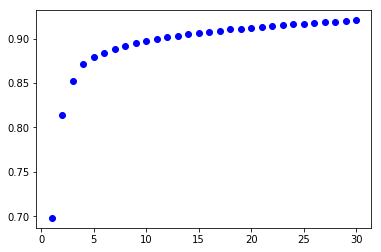

In [12]:
def training(training_data, weights, biases, epochs=30, mb_number=10, learning_rate=7.5, regularization=0.001, validation=False, validation_data=None):
    plt.figure()
    for epoch in range(epochs):
        random.shuffle(training_data)
    
        mb_size = len(training_data) // mb_number
        mini_batches = [training_data[i*mb_size:(i+1)*mb_size] for i in range(mb_number)]
    
        for mini_batch in mini_batches:
            for x, y in mini_batch:
                activations = feed_forward(x, weights, biases)
                w_gradient, b_gradient = backpropagation(y.reshape(-1, 1), activations, weights)
            
                rescale_factor = 1 - learning_rate * regularization / len(training_data)
                weights = [rescale_factor * w - learning_rate / len(mini_batch) * wn for w, wn in zip(weights, w_gradient)]
                biases = [b - learning_rate / len(mini_batch) * bn for b, bn in zip(biases, b_gradient)]
                
        if validation:
            accuracy = validation_accuracy(training_data, weights, biases)
            plt.plot(epoch + 1, accuracy, 'bo')
            print('Accuracy on training dataset: {}'.format(accuracy))
                
        print('Epoch {} completed!'.format(epoch + 1))
        
    print('Accuracy on validation dataset: {}'.format(validation_accuracy(validation_data, weights, biases)))
    plt.show()
    
    return weights, biases

final_weights, final_biases = training(training_data, weights, biases, validation=True, validation_data=validation_data)

In [14]:
X_test = np.array(df_train.iloc[:, 1:] / 255.0)
y_test = np.array(df_train['label']).reshape(-1, 1)

y_test = enc.fit_transform(y_test).toarray()

test_data = list(zip(X_test, y_test))

validation_accuracy(test_data, final_weights, final_biases)

0.9202666666666667